In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
image_index = 771 # You may select anything up to 60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[image_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   6,  47, 140, 221, 255, 220,  19,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20,  94,  94, 172, 204, 253, 253, 253, 253, 181,  19,   0,
          0,   0],
       [  

In [6]:
def calculateDensity(Iteration, density):
    N=28
    probMatrix=[]
    countMatrix=[]
    for z in range(10):
        matrix=[[0 for x in range(N)] for y in range(N)]
        probMatrix.append(matrix)
        countMatrix.append(0)

    for i in range(Iteration):
        img=x_train[i]
        number=y_train[i]
        matrix=probMatrix[number]
        countMatrix[number]+=1
        for x in range(28):
            for y in range(28):
                if img[x][y]>=density:
                    matrix[x][y]+=1
                
    for i in range(10):
        matrix=probMatrix[i]
        for x in range(28):
            for y in range(28):
                matrix[x][y]/=countMatrix[i]
    
    return probMatrix

In [7]:
import numpy as np

def calculateNumber(exImg, densityMatrix, density):
    finalProb=[]
    for i in range(10):
        matrix=densityMatrix[i]
        resultMatrix=[]
        for x in range(28):
            for y in range(28):
                if exImg[x][y]>=density:
                    resultMatrix.append(matrix[x][y])
                else:
                    resultMatrix.append(1-matrix[x][y])
        result=np.mean(resultMatrix)
        finalProb.append(result)
        
    
    print(finalProb)
    
    return np.argmax(finalProb)

In [8]:
from random import randint

Iteration=10000
Density=45

densityMatrix= calculateDensity(Iteration, Density)

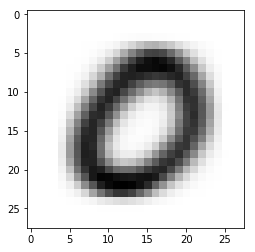

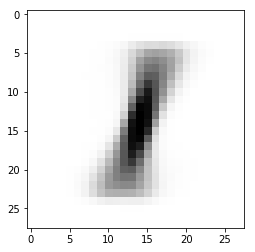

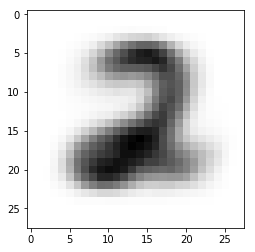

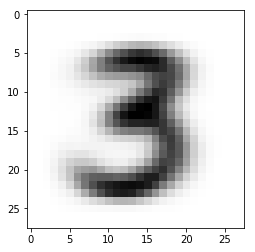

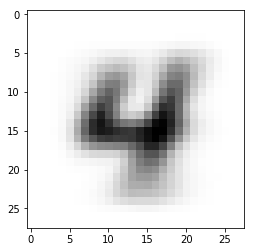

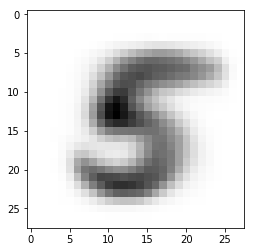

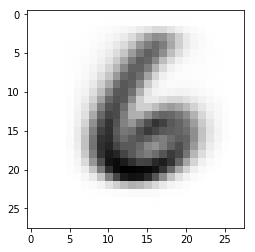

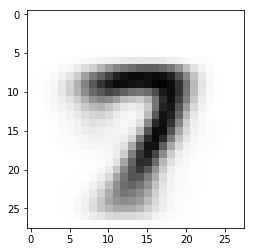

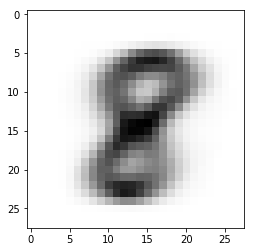

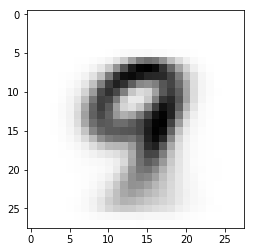

In [9]:
densityMatrix256=densityMatrix
for i in range(10):
    matrix=densityMatrix256[i]
    for x in range(28):
        for y in range(28):
            matrix[x][y]*=256
    

for i in range(10):
    plt.imshow(densityMatrix256[i], cmap='Greys')
    plt.show()

[0.7708987441130298, 0.8966836734693877, 0.7971938775510204, 0.8319805194805194, 0.8118042671614101, 0.853826530612245, 0.8446196660482376, 0.8403061224489795, 0.8380102040816326, 0.8514610389610389]
Predicted results:  1
Value: 1


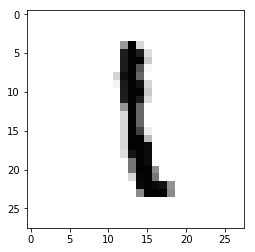

In [10]:
from random import randint

Iteration=100
Density=45

densityMatrix= calculateDensity(Iteration, Density)
tmpInt=randint(0,55000)
exImg = x_train[tmpInt]
results=calculateNumber(exImg, densityMatrix, Density)
print("Predicted results: ", results)
print("Value:" , y_train[tmpInt])
plt.imshow(x_train[tmpInt], cmap='Greys')

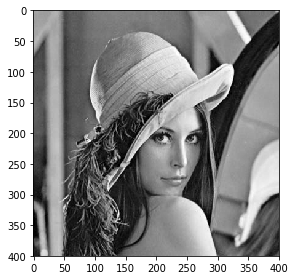

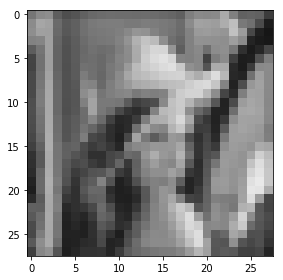

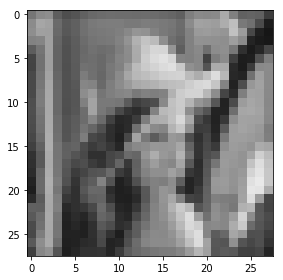

In [42]:
from skimage import io, viewer
from skimage.transform import rescale, resize

img = io.imread('Lenna.jpg', as_grey=True)
io.imshow(img)
plt.show()
#Rescaled 1
img_rescaled = resize(img, (img.shape[0]/(img.shape[0]/28.0), img.shape[1]/(img.shape[1]/28.0)), anti_aliasing=True)
io.imshow(img_rescaled)
plt.show()

#Rescaled 2
img_rescaled2 = rescale(img, 28.0/400.0, anti_aliasing=True)
io.imshow(img_rescaled2)
plt.show()

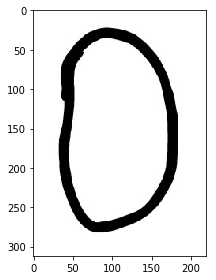

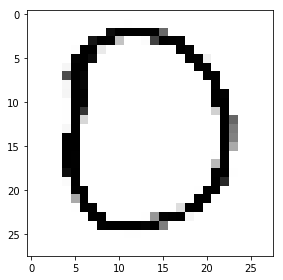

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 9.95543217e-01
  9.98499400e-01 9.96428571e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  9.97

In [67]:
img = io.imread('img/Drawing0.jpeg', as_grey=True)
io.imshow(img)
plt.show()
#Rescaled 1
img_rescaled = resize(img, (img.shape[0]/(img.shape[0]/28.0), img.shape[1]/(img.shape[1]/28.0)))
io.imshow(img_rescaled)
plt.show()

print(img_rescaled)
results=calculateNumber(img_rescaled, densityMatrix, Density)
print("Predicted results: ", results)